# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [225]:
import pandas as pd
import numpy as np

#for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error


## Loading the dataset

In [226]:
data = pd.read_csv('C:/Users/samyu/Documents/PGP - DSBA/Supervised Learning Techniques/Project/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [227]:
data.shape

(3454, 15)

There are 3454 rows and 15 columns in the data set

In [228]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Most of the columns in the dataset are numeric in nature.
The fields like brand name, os , 4g and 5g are object type

In [230]:
#checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


We observe 11 columns as the other 4 are categorical.By default describe shows the statistical summary for numerical columns only.

In [231]:
#checking the statistical summary for non numerical columns
data.describe(exclude='number').T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


we observe that main_camera_mp , selfie_camera_mp , int_memory, ram,battery, weight have missing values. We will analyse them in more detail

In [232]:
#checking and confirming the missing values
##data.isnull().sum()

## in percentage
data.isnull().sum()/data.shape[0]*100

brand_name               0.000000
os                       0.000000
screen_size              0.000000
4g                       0.000000
5g                       0.000000
main_camera_mp           5.182397
selfie_camera_mp         0.057904
int_memory               0.115808
ram                      0.115808
battery                  0.173712
weight                   0.202664
release_year             0.000000
days_used                0.000000
normalized_used_price    0.000000
normalized_new_price     0.000000
dtype: float64

We do observe that the above mentioned 6 columns are the ones with the missing values

In [233]:
#checking for duplicates in the data
data.duplicated().sum()

0

This confirms that there are no duplicates in the data. We have completed all observations and sanity checks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

For the Exploratory Data Analysis - we will perform them in two parts. The first being Univariate Analysis and the second being the MultiVariate Analysis.
Fpr Univariate analysis - we will plot a histogram and a boxplot for all the numerical variables and barplots for all categorical variables

### UniVariate Analysis

In [234]:
## we write a function to get a histogram and boxplot for all the numerical variables
##This function takes the numerical variable as input and returns a boxplot and histogram and will help in making our analysis more efficient and quicker

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2,(ax_box2, ax_hist2)= plt.subplots(nrows = 2,sharex = True,gridspec_kw ={"height_ratios": (0.25,0.75)},figsize=figsize,)
    sns.boxplot(data=data,x=feature,ax= ax_box2,showmeans = True,color = "violet")
    sns.histplot(data=data,x=feature,ax=ax_hist2,kde=kde,bins=bins
    ) if bins else sns.histplot(
        data=data,x=feature,ax=ax_hist2,kde=kde)
    ax_hist2.axvline(data[feature].mean(),color="green",linestyle="--")
    ax_hist2.axvline(data[feature].median(),color="black",linestyle="-")
    


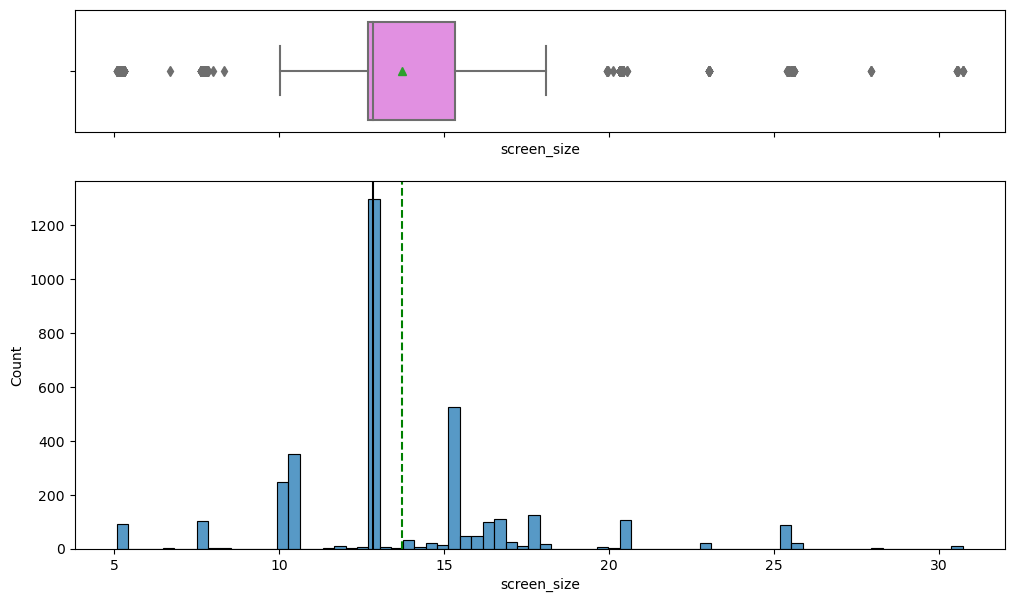

In [235]:
histogram_boxplot(data,"screen_size")

The median size is somewhere around 14 cms and there seems to be many outliers on both the lower and upper quartile end.

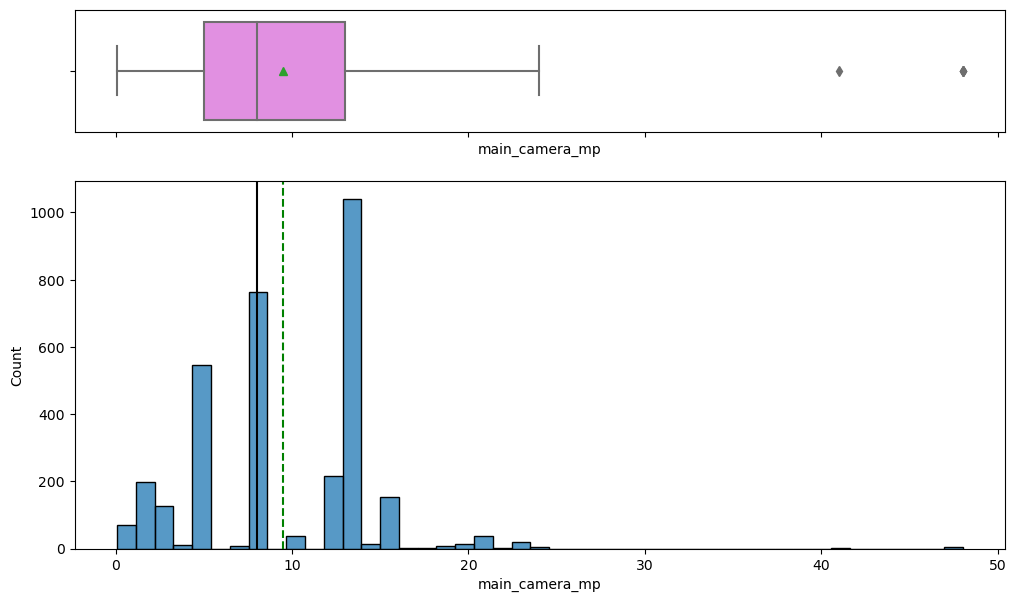

In [236]:
histogram_boxplot(data,"main_camera_mp")

The median camera mp is around 9 mp.There are outliers but not as many as the screen size.

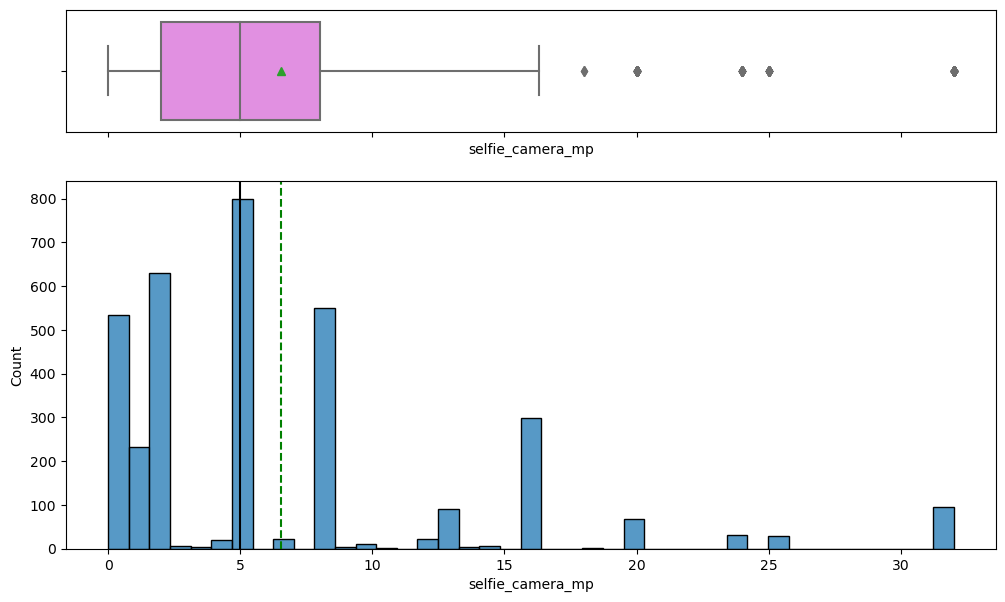

In [237]:
histogram_boxplot(data,"selfie_camera_mp")

The median of selfie camera mp is around 7 mp with some outliers

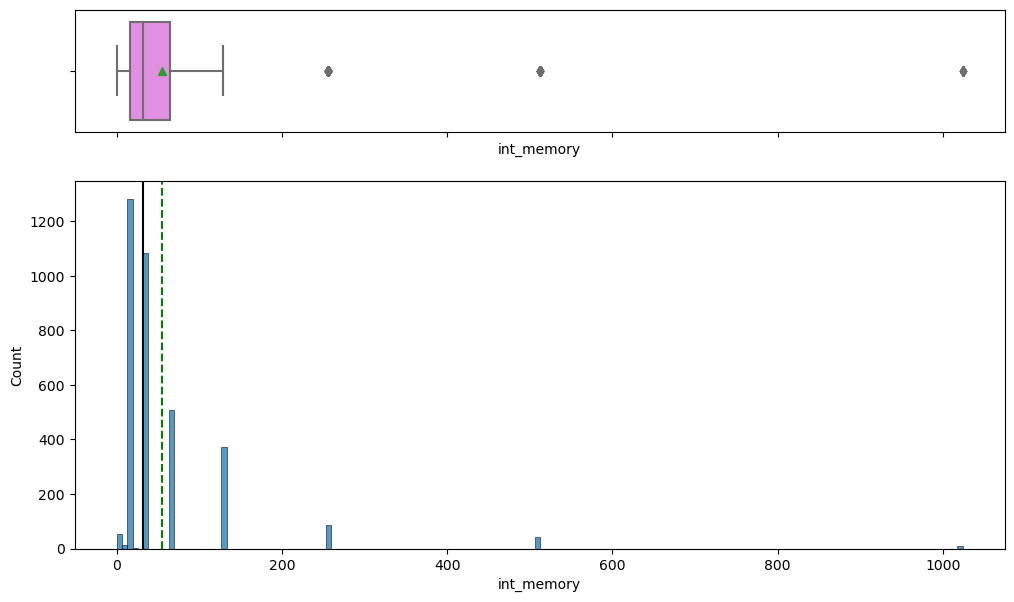

In [238]:
histogram_boxplot(data,"int_memory")

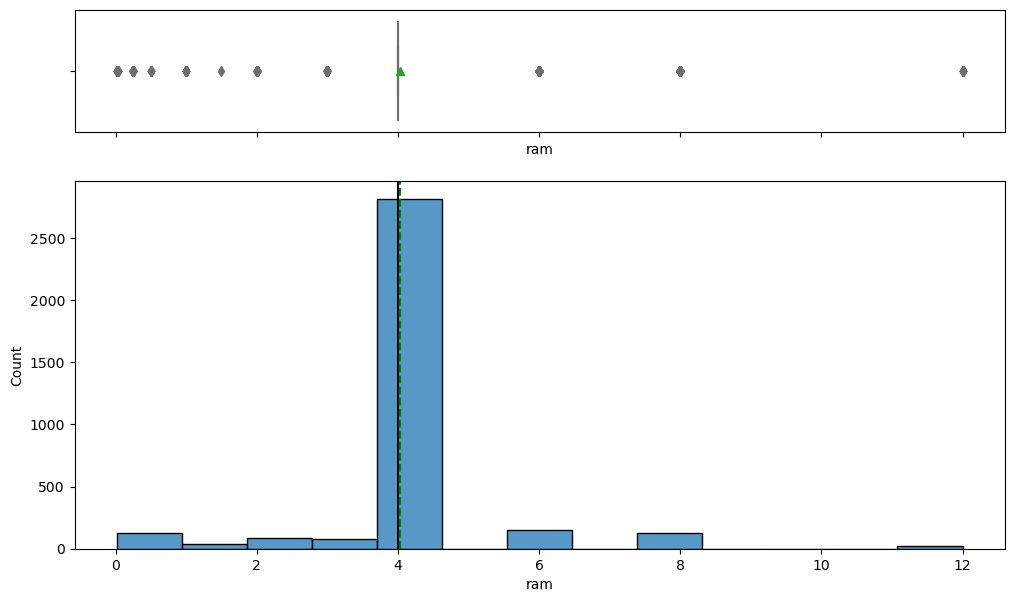

In [239]:
histogram_boxplot(data,"ram")

The RAM seems to not have a lower or upper quartile and neither does it have median.

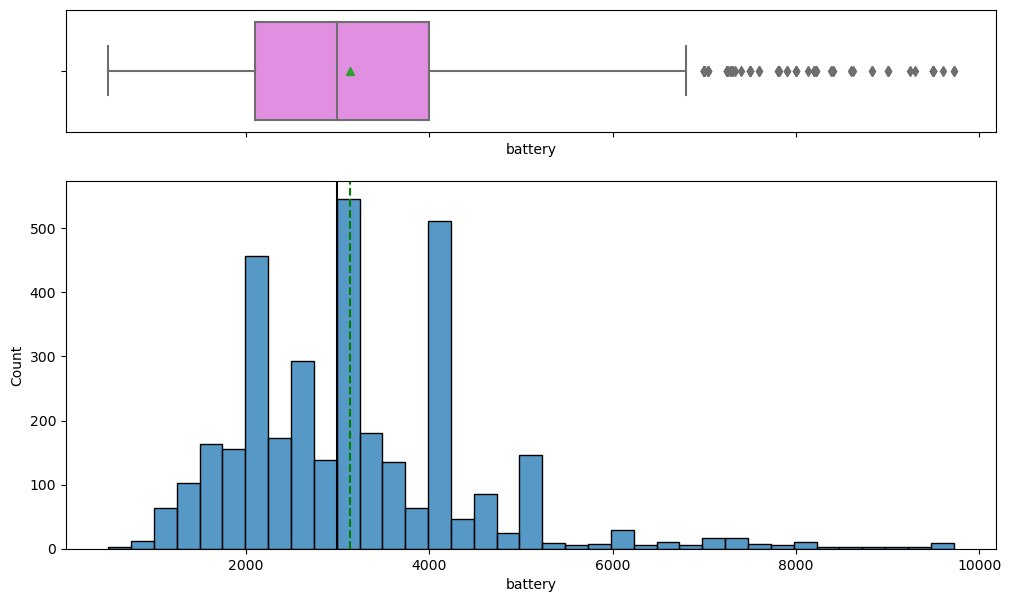

In [240]:
histogram_boxplot(data,"battery")

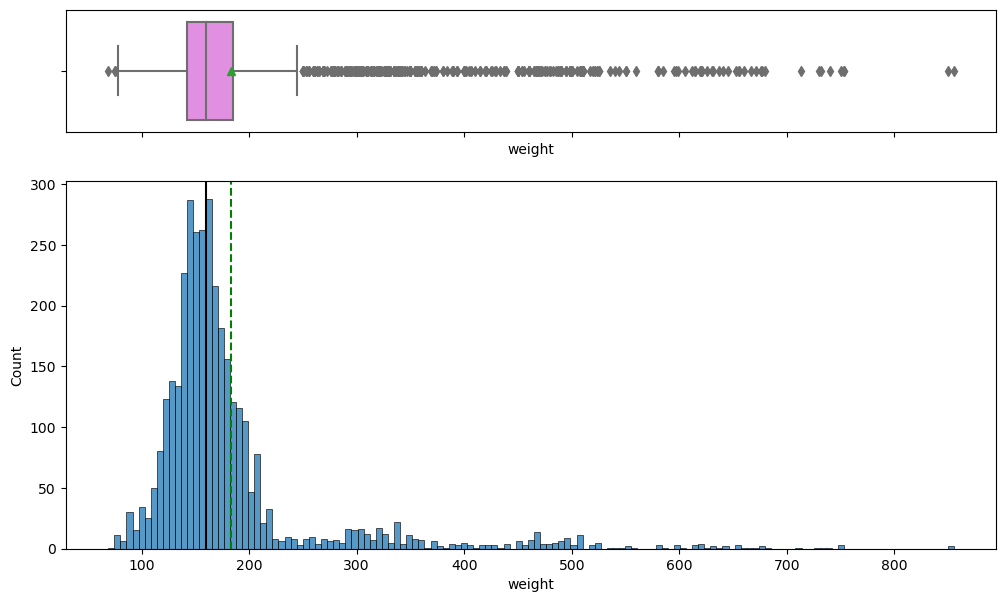

In [241]:
histogram_boxplot(data,"weight")

The weight seems to have many outliers in its data and the median is around 180 grams.

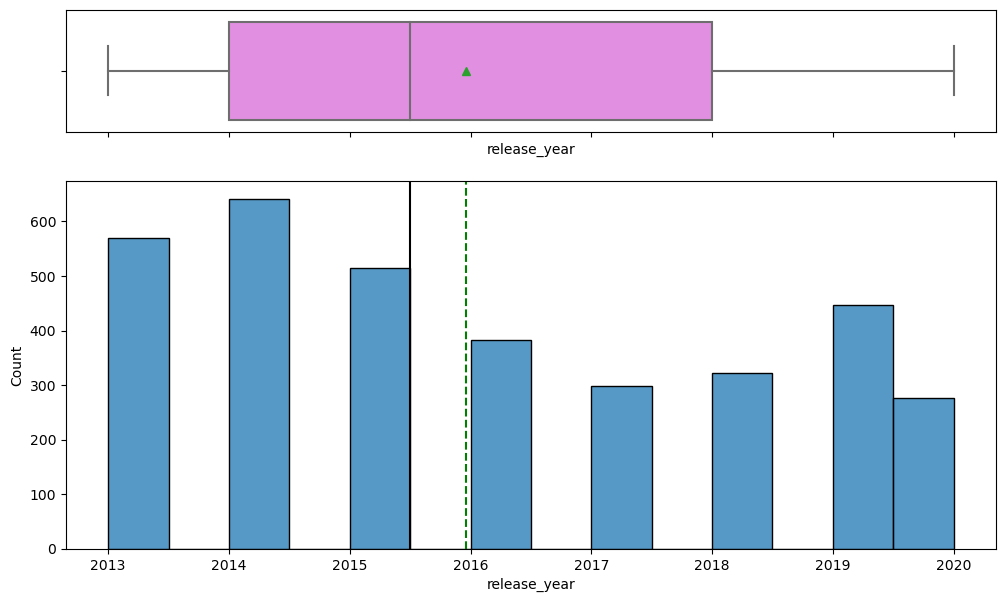

In [242]:
histogram_boxplot(data,"release_year")

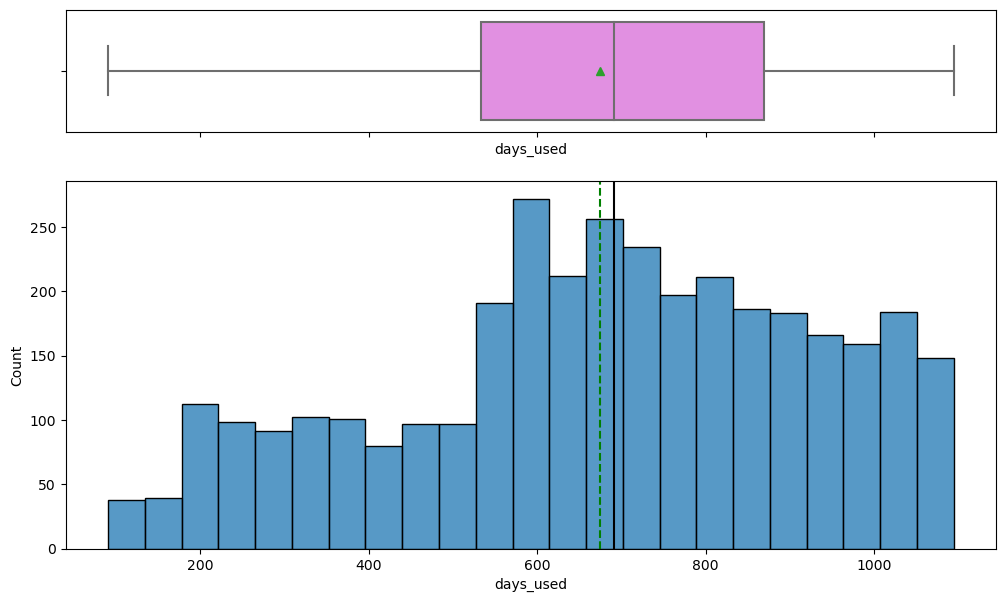

In [243]:
histogram_boxplot(data,"days_used")

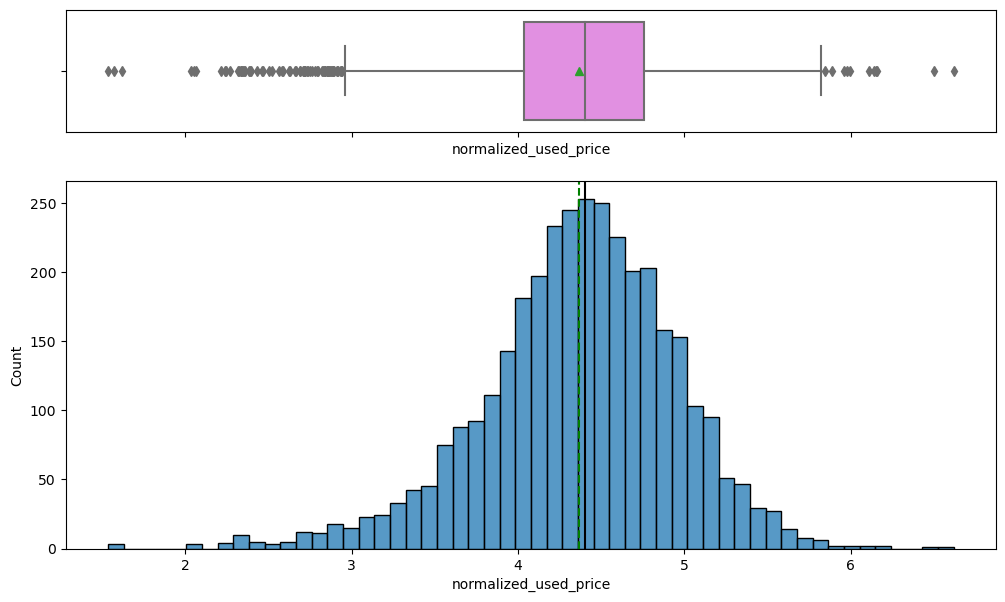

In [244]:
##distribution of normalized used prices
histogram_boxplot(data,"normalized_used_price")

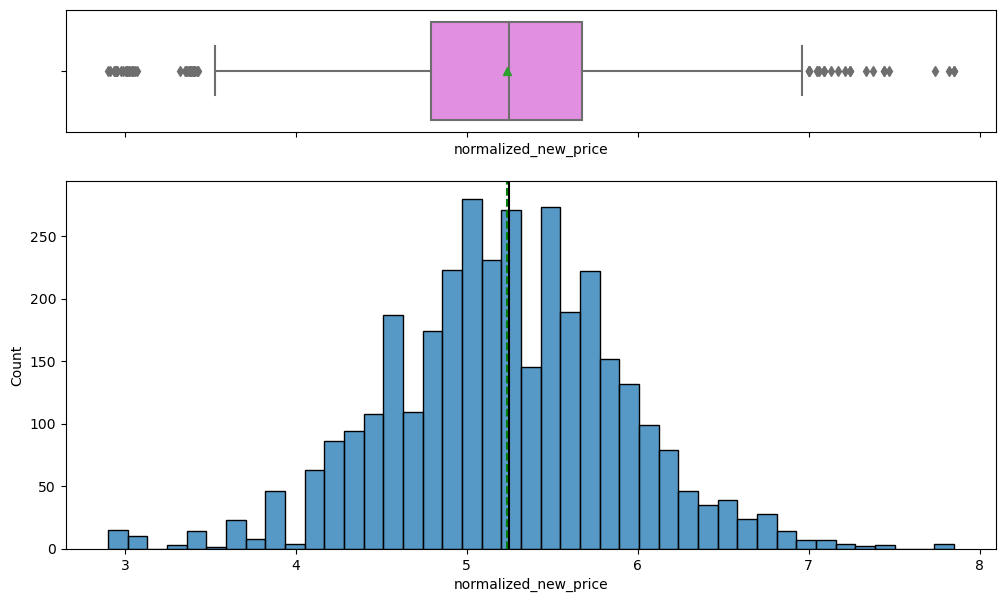

In [245]:
histogram_boxplot(data,"normalized_new_price")

In [246]:
# function to create labeled barplots
# https://moonbooks.org/Articles/How-to-add-text-on-a-bar-with-matplotlib-/

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

# https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/
# https://towardsdatascience.com/texts-fonts-and-annotations-with-pythons-matplotlib-dfbdea19fc57
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=15,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

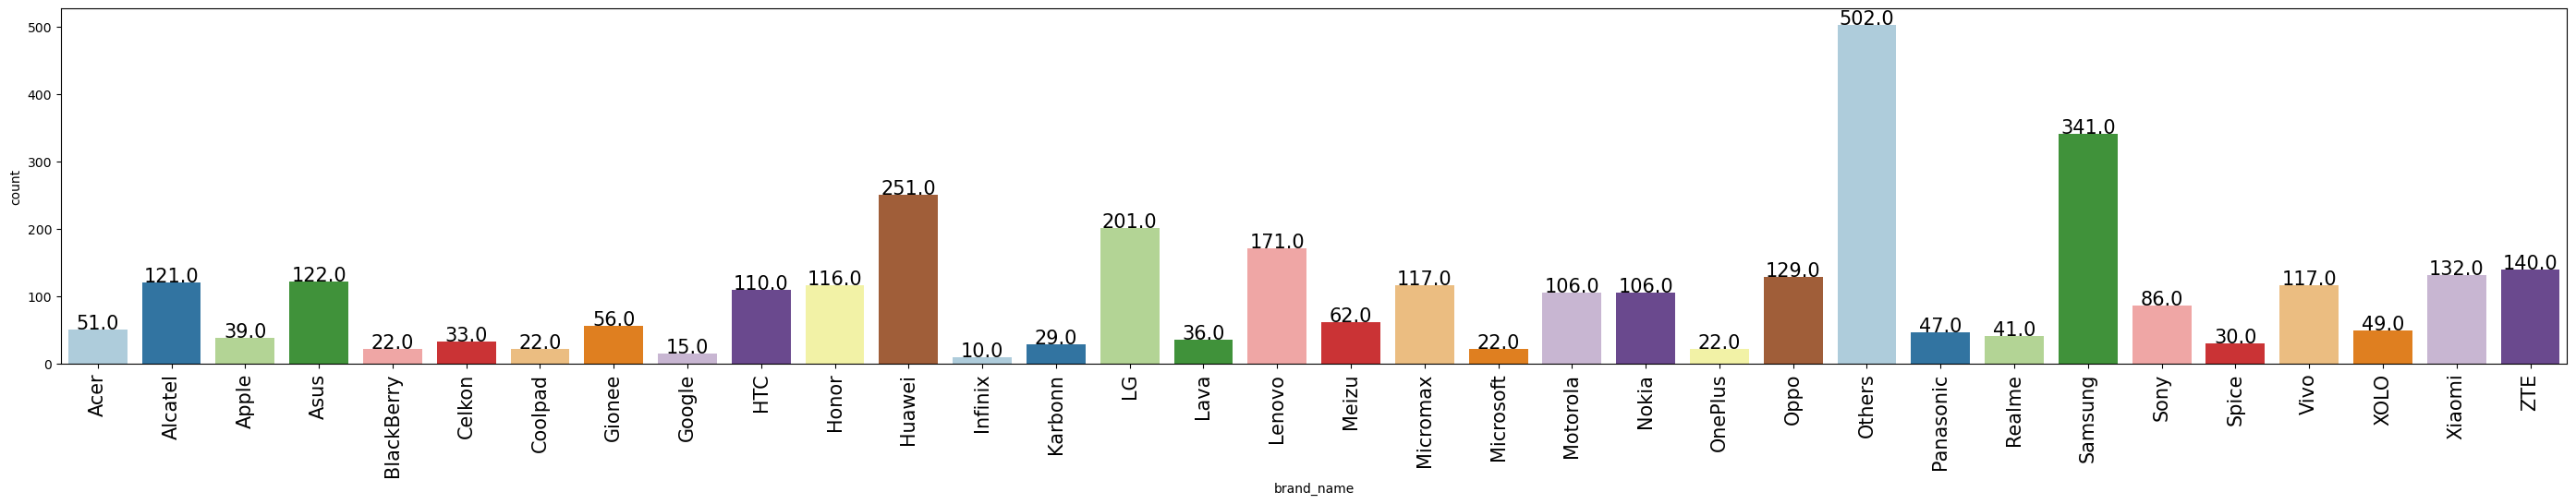

In [247]:
##bar chart for brand name
labeled_barplot(data, "brand_name", perc=False, n=None)

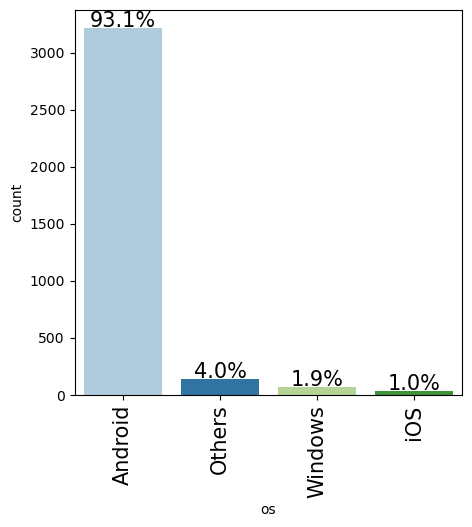

In [248]:
##bar chart for os to indicate the percentage of used device market dominated by android
labeled_barplot(data,"os", perc=True, n=None)

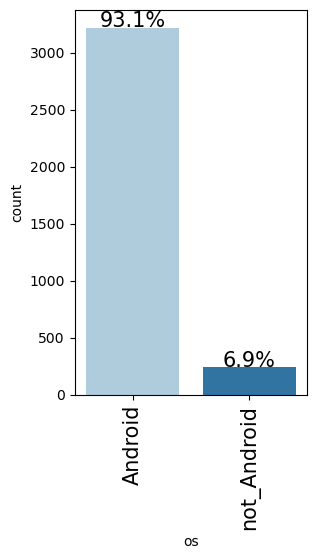

In [249]:
## since android has the most percentage of used devices , we will recategorise the remaining Others,Windows and iOS to not android category
data.loc[data.os=="Others", "os"] = "not_Android"
data.loc[data.os=="Windows", "os"] = "not_Android"
data.loc[data.os=="iOS", "os"] = "not_Android"

labeled_barplot(data,"os",perc = True, n=None)

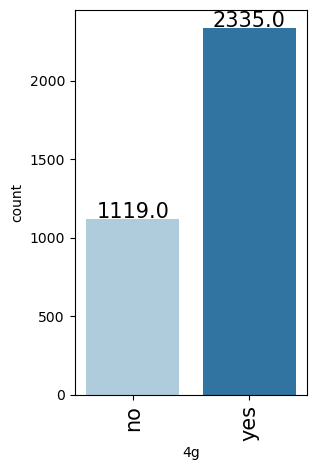

In [250]:
##barplot for 4g
labeled_barplot(data,"4g",perc =False, n=None)

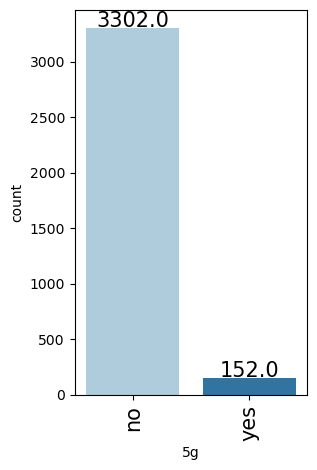

In [251]:
##barplot for 5g
labeled_barplot(data,"5g",perc =False, n=None)

### BiVariate Analysis

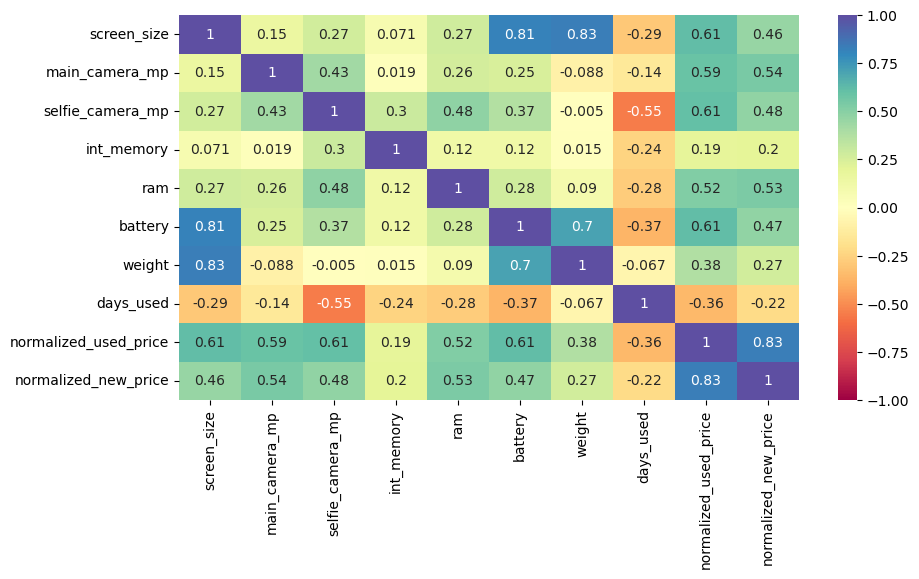

In [252]:
## Let's check the correlation between the numerical variables
data1 = data[['screen_size','main_camera_mp','selfie_camera_mp','int_memory','ram','battery',
              'weight','days_used','normalized_used_price','normalized_new_price']]
data1
plt.figure(figsize=(10,5))
sns.heatmap(data1.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()
##,'main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight','days_used','normalized_used_price','normalized_new_price']

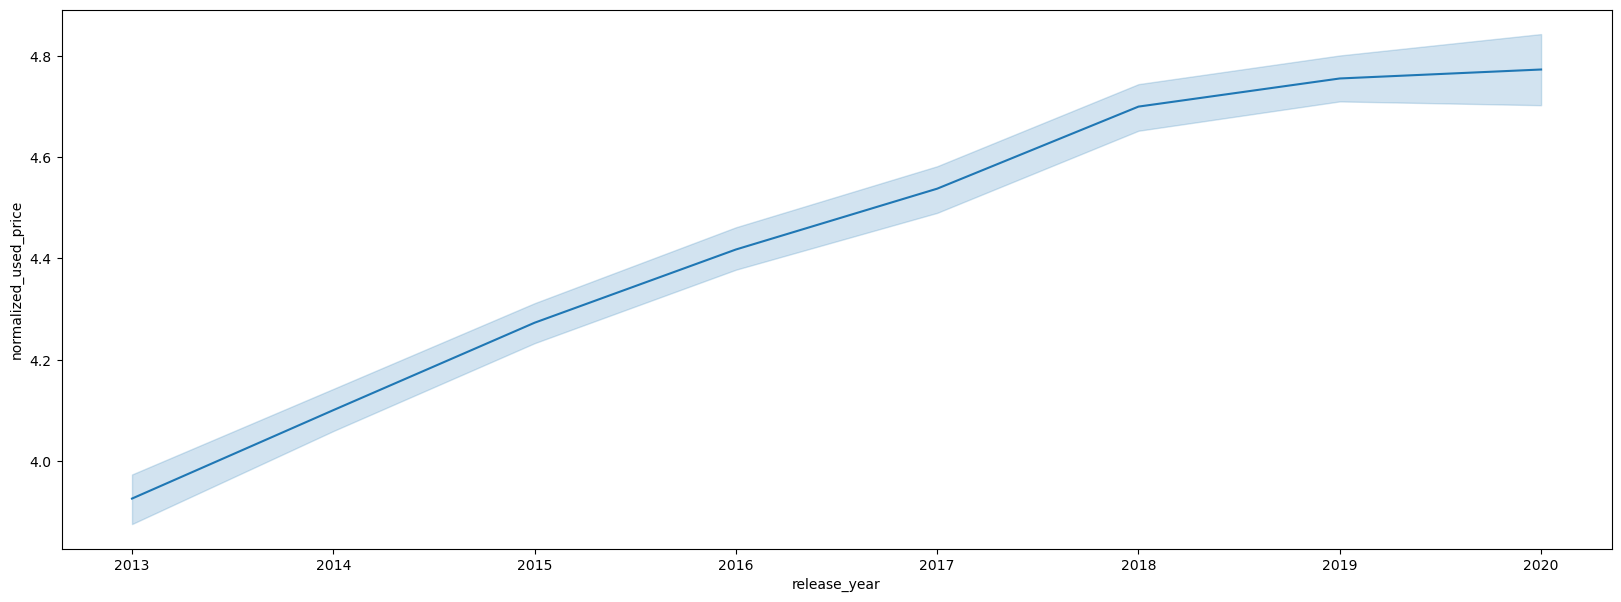

In [253]:
## distribution of normalized used device prices over the years are found below
plt.figure(figsize=(20,7))
sns.lineplot(data=data, y='normalized_used_price',x='release_year')
plt.show();


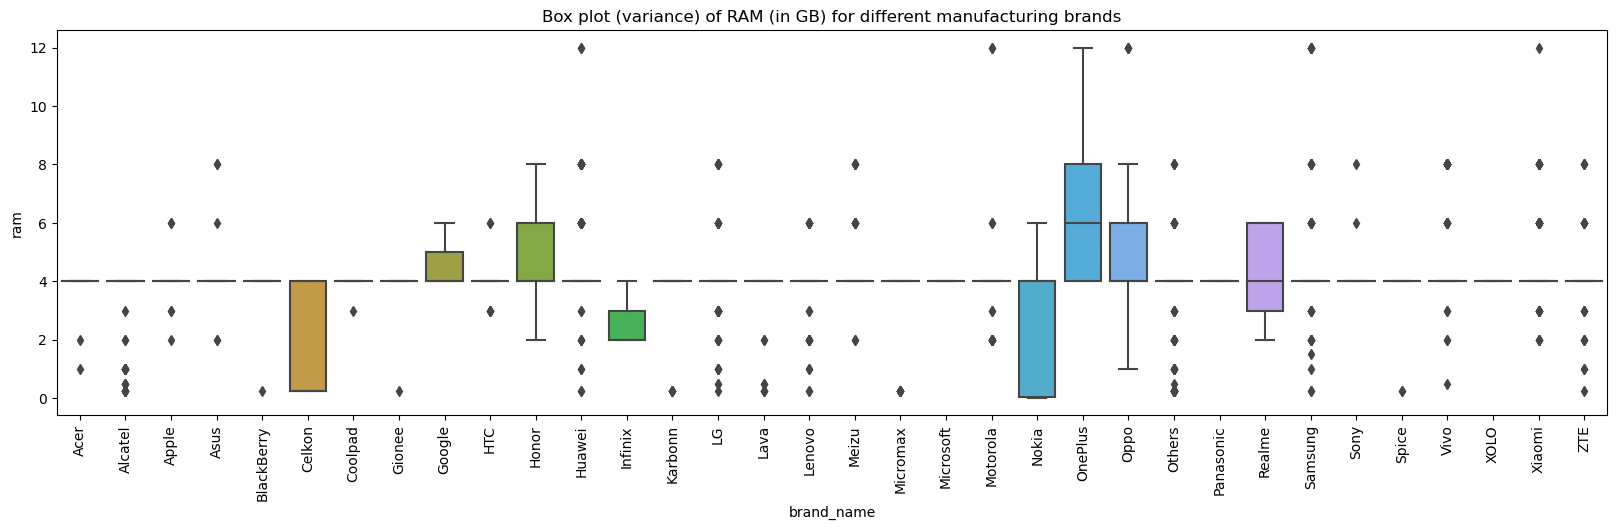

In [254]:
## the percentage of RAM varying with different brands
plt.figure(figsize=(20,5))

sns.boxplot(data = data.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.title("Box plot (variance) of RAM (in GB) for different manufacturing brands")
plt.show()

We can see that there are many outliers present in this data. We can see that 4gb seems to be the common RAM for most mobile phones. In some brands , it is the average , while others it is either the minimum or maximum.

In [255]:
## Let us check the relation between a phone's weight and battery for whose phones where the battery is more than 4500 mAh
databattery = data[data["battery"]>4500]
databattery.shape

(341, 15)

There are 341 rows and 15 columns in the dataset after filtering it out for the records with battery more than 4500 mAh

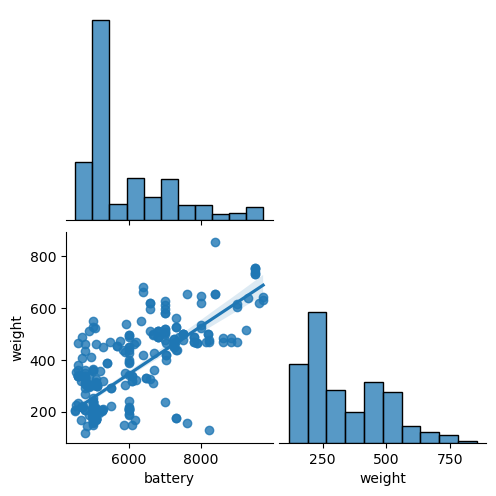

Linear correlation factor between phone's weight and battery 0.76


C:\Users\samyu\AppData\Local\Temp\ipykernel_24536\459806831.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(databattery.corr()["weight"]["battery"] , 2))


In [256]:
## let's check the distribution of weight and battery
sns.pairplot(data = databattery[["battery","weight"]], corner=True, kind="reg")
plt.show()
print("Linear correlation factor between phone's weight and battery", \
      round(databattery.corr()["weight"]["battery"] , 2))

the pairplot clearly shows that there is an upward trend between weight and battery with a positive correlation of 0.7 indicating that as the battery size increases , the weight of the phone also increases

In [257]:
##we are checking what phones and tablets across different brands have screen size greater than 6 inches
##converting 6 inches to cm since the data of screen size is in cm
print ("the screen size in cm is:", 6*2.54 )

the screen size in cm is: 15.24


In [258]:
##filtering the data for screen size greater than 15.24
datascreen = data[data["screen_size"]> 15.24]
datascreen.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694


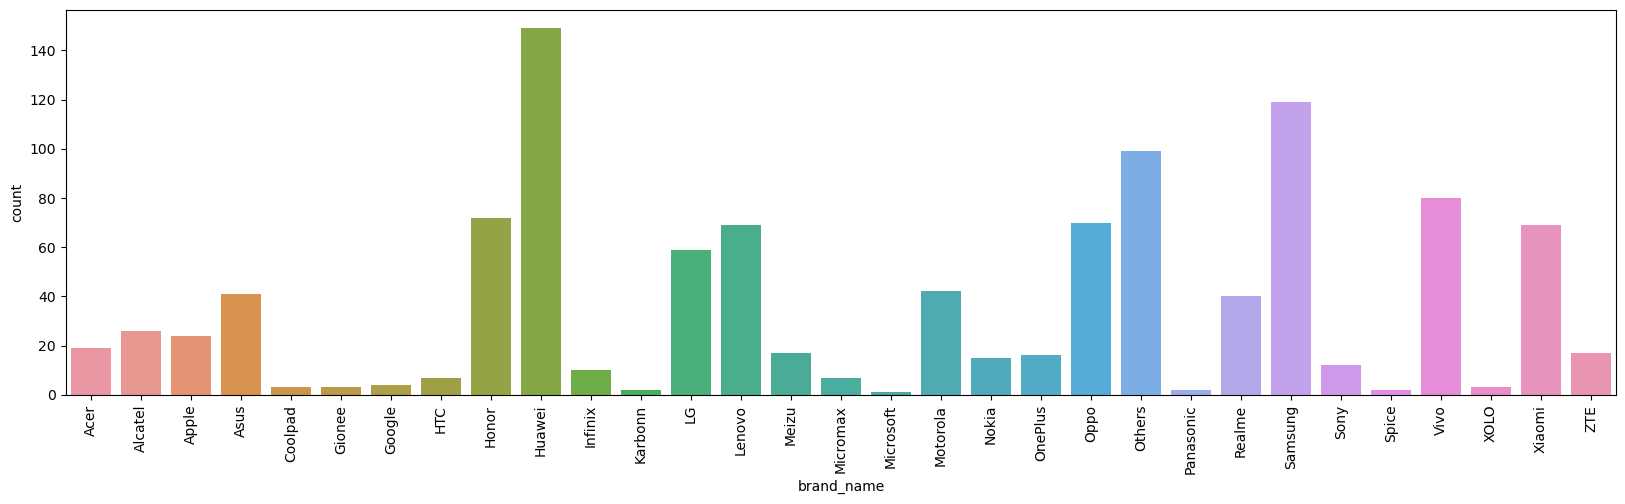

In [259]:
plt.figure(figsize=(20,5))
sns.countplot(data=datascreen.sort_values("brand_name",ascending = True), x='brand_name');
plt.xticks(rotation = 90)
plt.show()

There are many brands that have large screens such as Huawei a, Samsung , Vivo, Xiaomi , Oppo etc.

In [260]:
##distribution of phones of different brands with camera mp of 8 or more
datamp = data[data["selfie_camera_mp"]> 8]
datamp.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,5.383256,6.213968
13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,4.617593,5.398751
16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,5.022366,5.517935


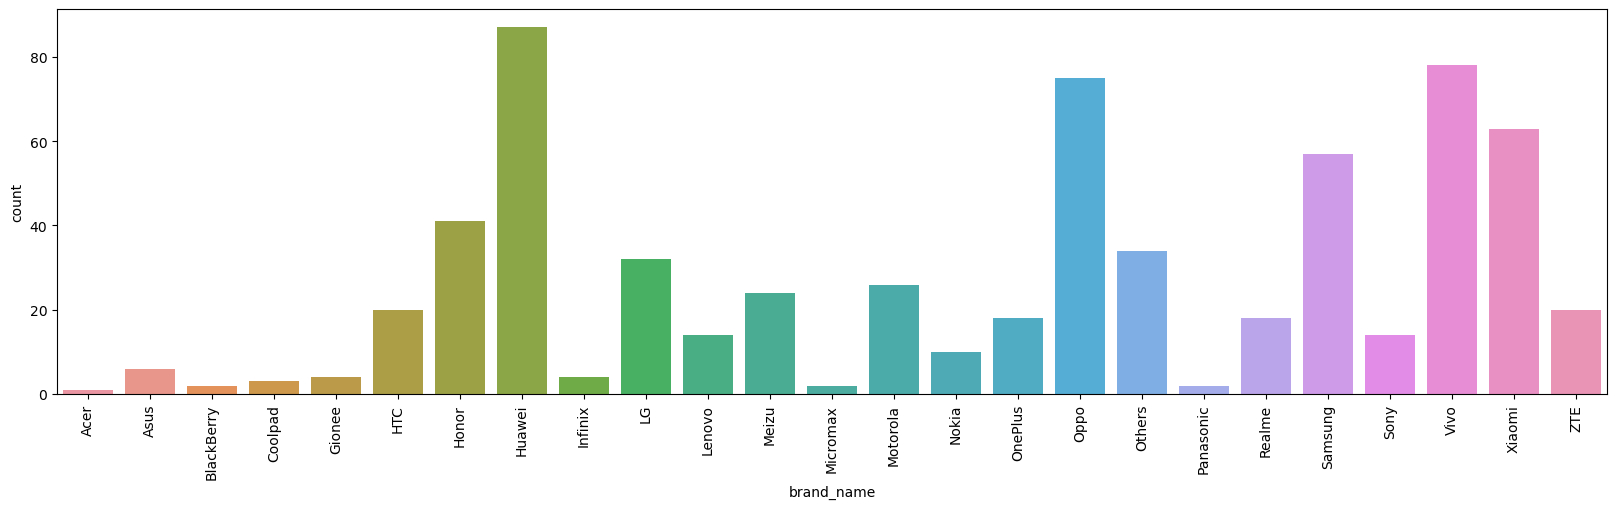

In [261]:
plt.figure(figsize=(20,5))
sns.countplot(data=datamp.sort_values("brand_name",ascending = True), x='brand_name');
plt.xticks(rotation = 90)
plt.show()

Brands such as Huawei , Oppo , Samsung, Vivo and xiaomi are the ones with the highest count of refurbished phones that have a mp of 8 or more.
Similarly Acer, Blackberry, Micromax and Panasonic are among the lower counts with refurbished phones that have less than 8 mp.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [262]:
## check for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

we observe that there are some missing values in main_camera_mp, selfie_camera_mp, int_memory and ram,battery and weight.
Let's analyse each of them in detail.

In [194]:
## checking what the data looks like for each column with missing values
## data[data["main_camera_mp"].isnull() == True]
##data[data["selfie_camera_mp"].isnull() == True]
##data[data["int_memory"].isnull() == True]
##data[data["ram"].isnull() == True]
##data[data["battery"].isnull() == True]

In [263]:
## imputing the missing values with the median since all the numeric variables with missing values have outliers
medianFiller = lambda x:x.fillna(x.median())

brand_names = data["brand_name"].unique()
numeric_column = data.select_dtypes(include = np.number).columns.to_list()

# we will group by brand name (low-range, mid-range or high-range), and for each numeric column, we will replace 
# the missing value with the median value of the numeric column of the respective brand name 

for item in brand_names:
    data.loc[data.brand_name==item, numeric_column] = \
    data.loc[data.brand_name==item, numeric_column].apply(medianFiller, axis=0)

In [264]:
## we check for missing values again after imputing the values with the median
data.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [265]:
data["main_camera_mp"] = data["main_camera_mp"].fillna(data["main_camera_mp"]).median() #
# Complete the code to impute the data with median

In [266]:
data.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All the missing values have been treated. We will do some feature engineering by removing the unnecessary columns. We can remove the column ram from our final model since it has mostly all values in the average range.

In [267]:
data.drop("ram", axis=1, inplace=True)

In [268]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,8.0,5.0,64.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,8.0,16.0,128.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,8.0,8.0,128.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,8.0,8.0,64.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,8.0,8.0,64.0,5000.0,185.0,2020,293,4.389995,4.947837


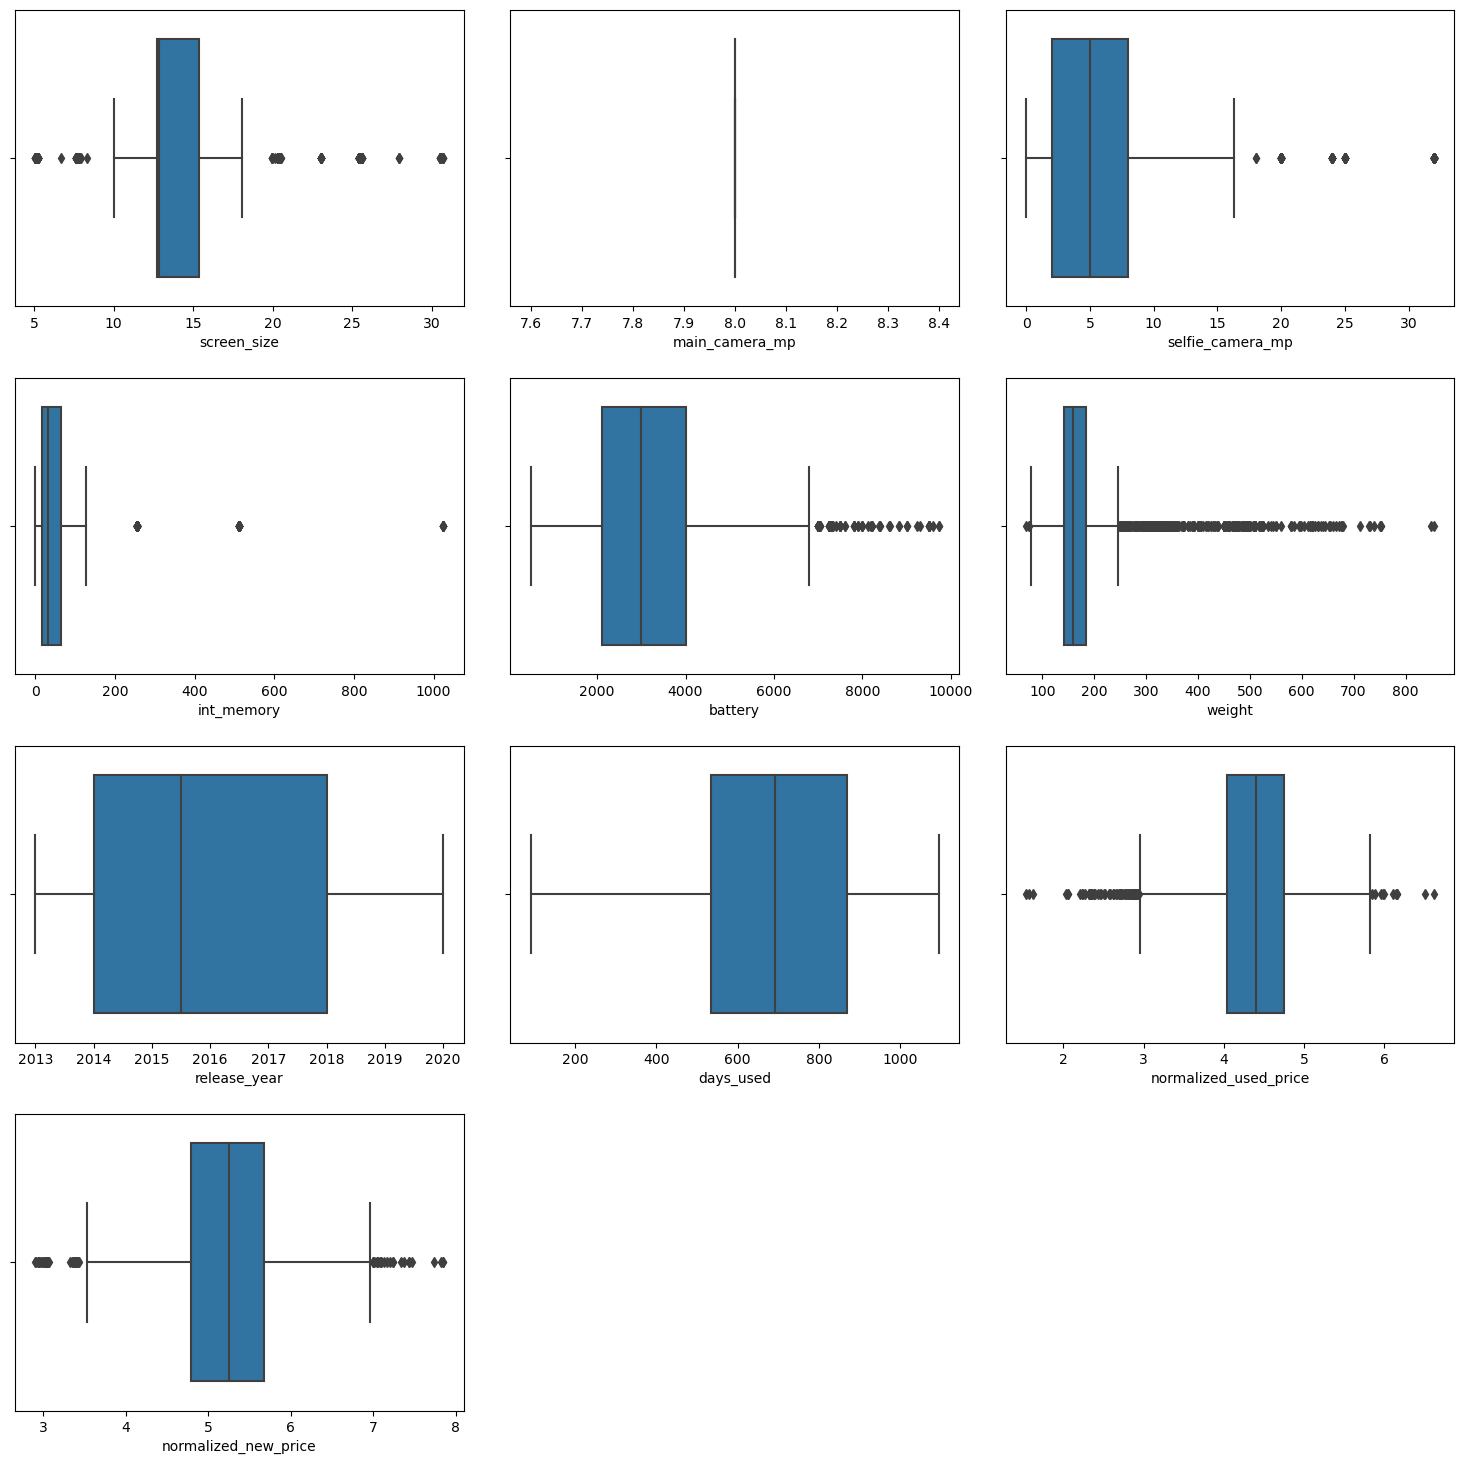

In [269]:
## we check for outliers in the data by plotting boxplots
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [270]:
## since there are many outliers in this dataset, it could affect our model. Hence we treat it by replacing the outliers with lower and upper quartile values respectively.
def treat_outliers(data, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    data: dataframe
    col: name of the column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)

    return data


def treat_outliers_all(data, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    data: data frame
    """
    for c in col_list:
        data = treat_outliers(data, c)

    return data

In [271]:
# treating the outliers
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

## EDA

- It is a good idea to explore the data once again after manipulating it.

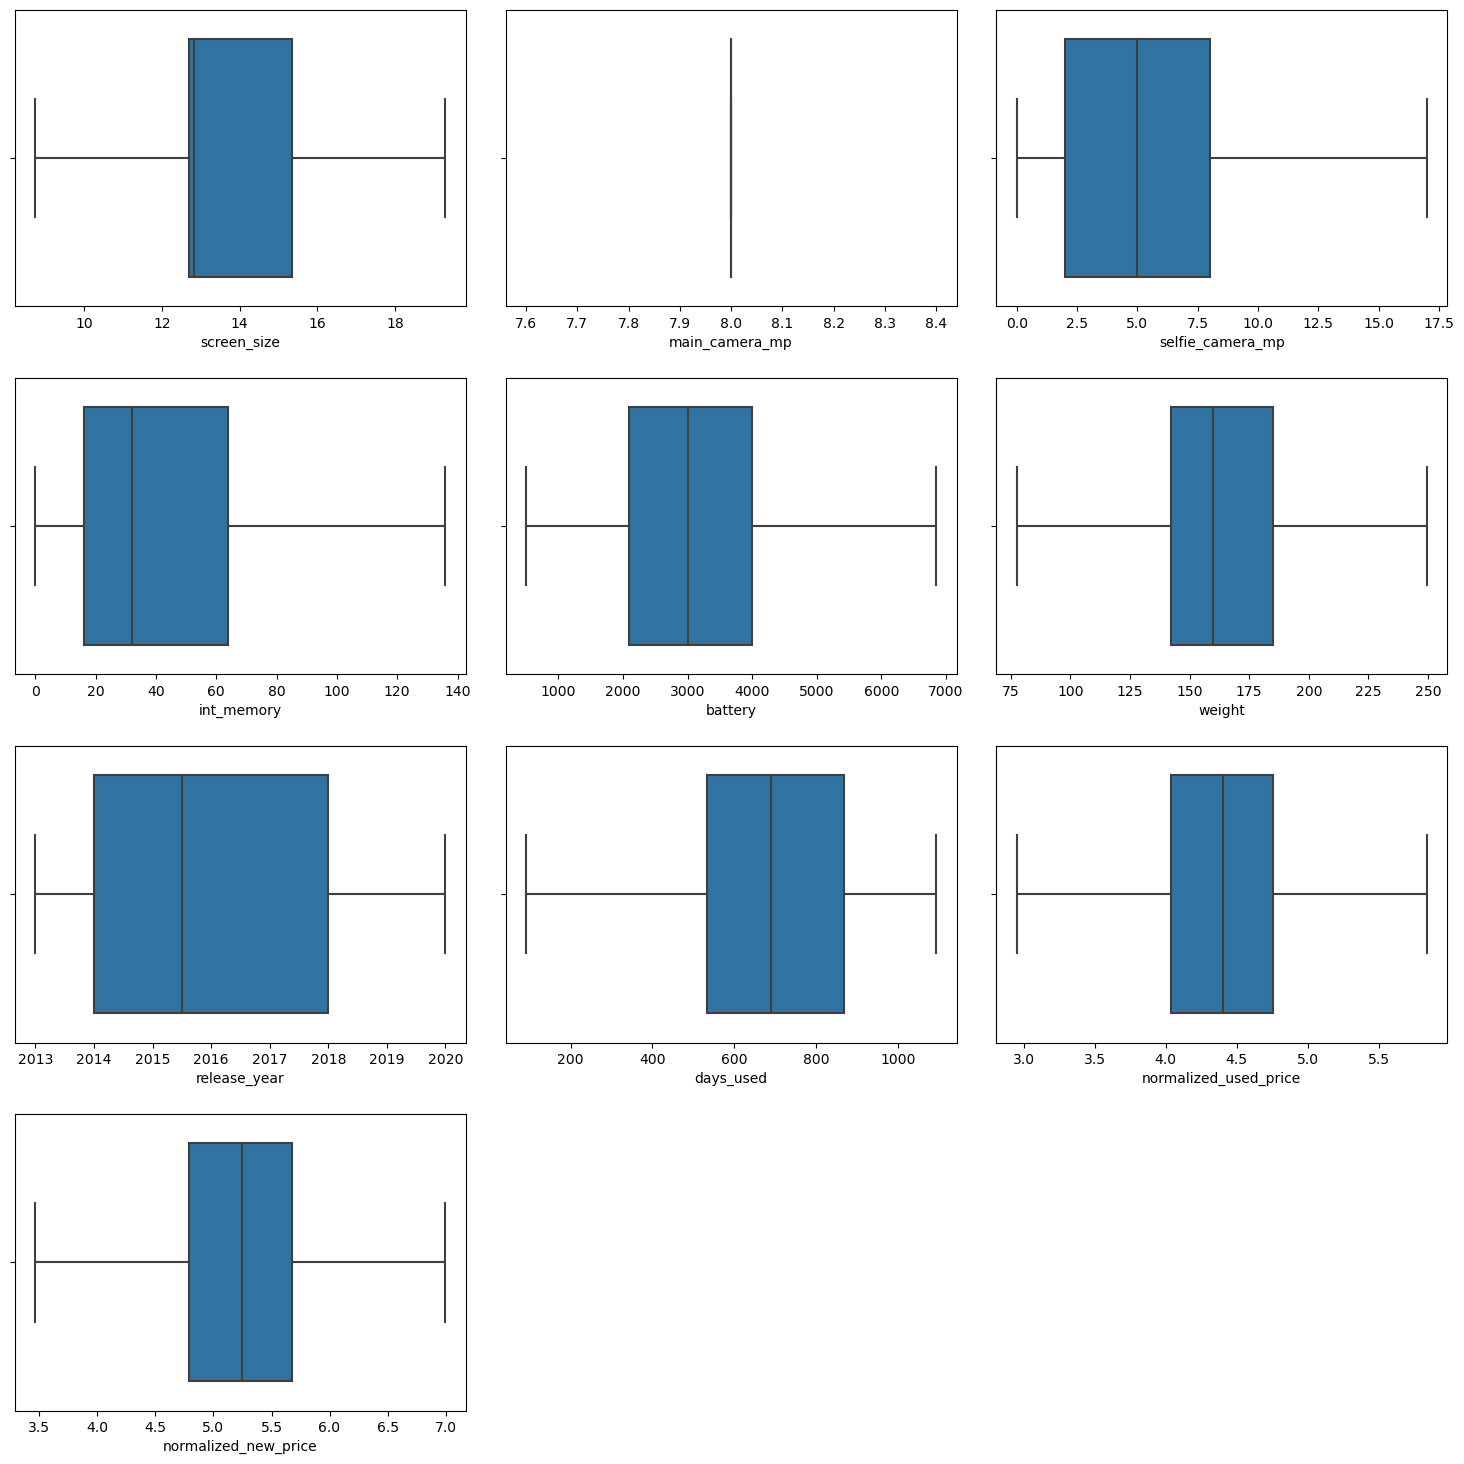

In [272]:
## we will check again if the outliers have been treated or not
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()

Now all the outliers have been treated. We proceed to build our linear regression model.

## Model Building - Linear Regression

In [273]:
# defining X and y variables
X = data.drop(["normalized_used_price", "release_year"], axis=1) # since year is a temporal variable
y = data["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no             8.0   
1      Honor  Android        17.30  yes  yes             8.0   
2      Honor  Android        16.69  yes  yes             8.0   
3      Honor  Android        19.30  yes  yes             8.0   
4      Honor  Android        15.32  yes   no             8.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0   146.0        127   
1              16.0       128.0   4300.0   213.0        325   
2               8.0       128.0   4200.0   213.0        162   
3               8.0        64.0   6850.0   249.5        345   
4               8.0        64.0   5000.0   185.0        293   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837  
0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: norm

In [280]:
#creating dummy variables
# drop_first=True will drop one of the three origin columns
#data = pd.get_dummies(data, columns=["brand_name","os","4g","5g"], drop_first=True)
#data.head()
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), \
    drop_first=True)

print(X.shape)
X.head()

(3454, 44)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,brand_name_Alcatel,brand_name_Apple,...,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_not_Android,4g_yes,5g_yes
0,14.50,8.0,5.0,64.0,3020.0,146.0,127,4.715100,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17.30,8.0,16.0,128.0,4300.0,213.0,325,5.519018,0,0,...,0,0,0,0,0,0,0,0,1,1
2,16.69,8.0,8.0,128.0,4200.0,213.0,162,5.884631,0,0,...,0,0,0,0,0,0,0,0,1,1
3,19.30,8.0,8.0,64.0,6850.0,249.5,345,5.630961,0,0,...,0,0,0,0,0,0,0,0,1,1
4,15.32,8.0,8.0,64.0,5000.0,185.0,293,4.947837,0,0,...,0,0,0,0,0,0,0,0,1,0


In [281]:
# adding intercept to the data
X = sm.add_constant(X)

In [282]:
## splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [283]:
print(X_train.head())

      screen_size  main_camera_mp  selfie_camera_mp  int_memory  battery  \
3026        10.29             8.0               0.3        16.0   1800.0   
1525        15.34             8.0               5.0        32.0   4050.0   
1128        12.70             8.0               5.0        32.0   2550.0   
3003        12.83             8.0               5.0        16.0   3200.0   
2907        12.88             8.0              16.0        16.0   2900.0   

      weight  days_used  normalized_new_price  brand_name_Alcatel  \
3026   120.0        819              4.796204                   0   
1525   225.0        585              5.434595                   0   
1128   162.0        727              5.137914                   0   
3003   126.0        800              5.189228                   0   
2907   160.0        560              5.016220                   0   

      brand_name_Apple  ...  brand_name_Samsung  brand_name_Sony  \
3026                 0  ...                   0             

In [284]:
print(X_test.head())

      screen_size  main_camera_mp  selfie_camera_mp  int_memory  battery  \
866         15.24             8.0               2.0        16.0   3000.0   
957         10.16             8.0               0.3       136.0   1400.0   
280         15.39             8.0               8.0        32.0   5000.0   
2150        12.83             8.0              16.0        64.0   3200.0   
93          15.29             8.0               5.0        32.0   3500.0   

      weight  days_used  normalized_new_price  brand_name_Alcatel  \
866    206.0        632              5.190788                   0   
957    140.0        637              3.884652                   0   
280    185.0        329              4.487287                   0   
2150   148.0        648              5.639422                   0   
93     179.0        216              5.300415                   0   

      brand_name_Apple  ...  brand_name_Samsung  brand_name_Sony  \
866                  0  ...                   0             

In [290]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()


In [291]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.830
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     269.5
Date:                   Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                           22:41:11   Log-Likelihood:                 119.06
No. Observations:                   2417   AIC:                            -150.1
Df Residuals:                       2373   BIC:                             104.7
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


The R square of the model indicates that it can explain 83% of the variance in the training set.

The coefficients tell us how one unit change in X can affect y.The sign of the coefficient indicates if the relationship is positive or negative. In this data set , the price of a used phone increases by 3% for a 1 unit increase in screen size , and by 12% for a 1 unit increase in the main camera mp.The same is true for selfie camera mp where the price increases by 2% for a 1 unit increase in mp of the selfie camera. These three factors seem to be of more importance than other features such as memory,battery or weight. 

## Model Performance Check

In [298]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [300]:
from sklearn.metrics import r2_score

In [301]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsres, X_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23034,0.182455,0.830049,0.826897,4.294553


In [302]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsres, X_train, y_train) 
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23034,0.182455,0.830049,0.826897,4.294553


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1.No Multicollinearity
2.Linearity of variables
3.Independence of error terms
4.Normality of error terms
5.No Heteroscedasticity

In [303]:
# For multicollinearity we will check the VIF. 
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [307]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [308]:
checking_vif(X_train)

,feature,VIF
0,screen_size,5.263698
1,main_camera_mp,217.535165
2,selfie_camera_mp,3.127178
3,int_memory,2.317492
4,battery,3.614200
5,weight,4.451547
6,days_used,1.972229
7,normalized_new_price,2.403931
8,brand_name_Alcatel,3.406291
9,brand_name_Apple,2.607577


For all the variables that have a VIF of 1 but within 5 , we can assume that there is no multicollinearity. FOr those variables such as screen_size,brand_name_Samsung , there is a VIF of 5 but within 10 and hence there is moderate collinearity. for the variable main_camera_mp the VIF is 217 which is way more than 10 and hence we say that there is very high multi collinearity.

In [309]:
## writing a function to treat multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [311]:
col_list = ["main_camera_mp","brand_name_Others","brand_name_Samsung"]
res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,main_camera_mp,0.996988,0.241994
1,brand_name_Samsung,0.827040,0.232419
2,brand_name_Others,0.827038,0.232420


In [332]:
col_to_drop = ("brand_name_Others")
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Others


,feature,VIF
0,screen_size,5.232058
1,main_camera_mp,146.677708
2,selfie_camera_mp,3.126625
3,int_memory,2.316872
4,battery,3.613908
5,weight,4.436317
6,days_used,1.971443
7,normalized_new_price,2.403911
8,brand_name_Alcatel,1.214988
9,brand_name_Apple,1.683664


we have treated for multicollinearity by removing brand_name_Others. checking for the model performance again

In [335]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.830
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     276.1
Date:                   Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                           17:21:00   Log-Likelihood:                 119.03
No. Observations:                   2417   AIC:                            -152.1
Df Residuals:                       2374   BIC:                             96.93
Df Model:                             42                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


We can see that adj. R-squared has remained approx. same 0.830 for the train set (70% dataset), which shows that the dropped column (brand_name_Others) did not have much effect on the model

In [323]:
## We will do a test for independence and linearity
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.810243,0.277244
1525,4.448399,4.641215,-0.192815
1128,4.315353,4.244788,0.070564
3003,4.282068,4.318974,-0.036906
2907,4.456438,4.478920,-0.022482


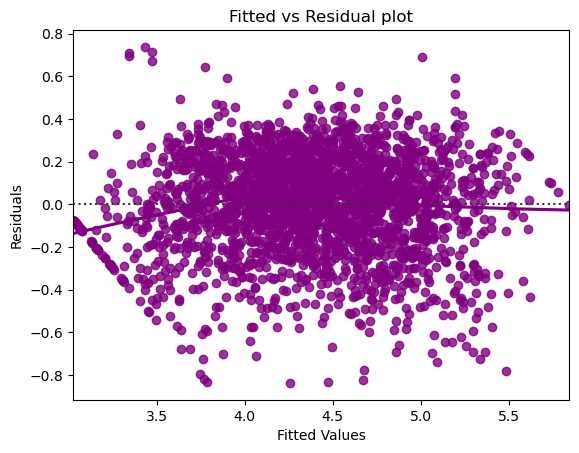

In [324]:
# let's plot the fitted values vs residuals

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

We see a very scattered pattern in the plot of residuals vs fitted values, however, this can be considered negligible given the range of residuals is very close to 0 (between -0.8 and 0.8). The pattern may indicate that the model has some non linear dependancies and may be improved by transforming the columns or better defined by non-linear models

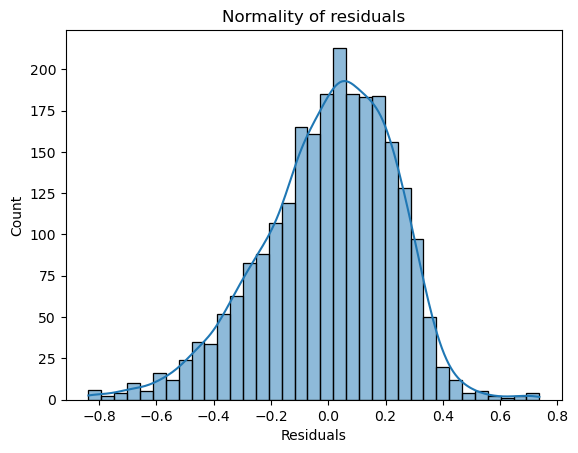

In [325]:
## test for normality
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

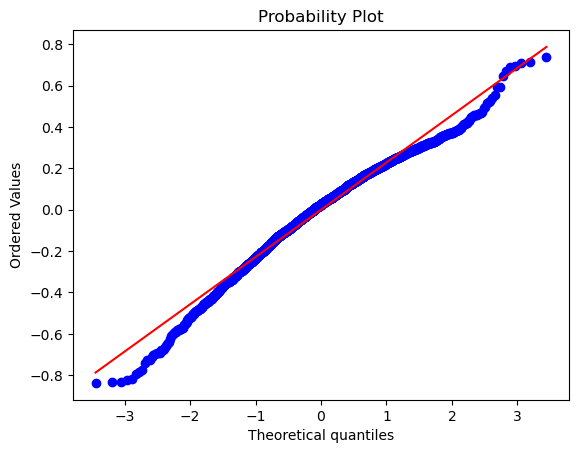

In [326]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [327]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9819431900978088, pvalue=5.741093363538592e-17)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test
Strictly speaking, the residuals are not normal
However, as an approximation, we can accept this distribution as close to being normal

In [336]:
## test for homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.1397153294935793), ('p-value', 0.012837010133963966)]

Since the p value is < 0.05 , the residuals are not homoscedastic.This assumption has not been satisfied.

## Final Model

In [338]:
# predictions on the test set
pred = olsmod1.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=1)

Sample of Actual and Predicted used_price by the ML model (in €)


,Actual,Predicted
1995,95.239957,80.379798
2341,50.493131,60.141483
1913,46.349258,52.142650
688,79.867798,70.564286
650,92.475076,137.541921
2291,77.270339,81.956297
40,124.826465,141.386031
1884,58.201721,66.286822
2538,74.439469,64.395253
45,155.759967,153.680530


We can observe here that our model has returned good prediction results, and the actual and predicted (used_price) are comparable, although there is further scope for improvement.We can also visualize comparison result as a bar graph

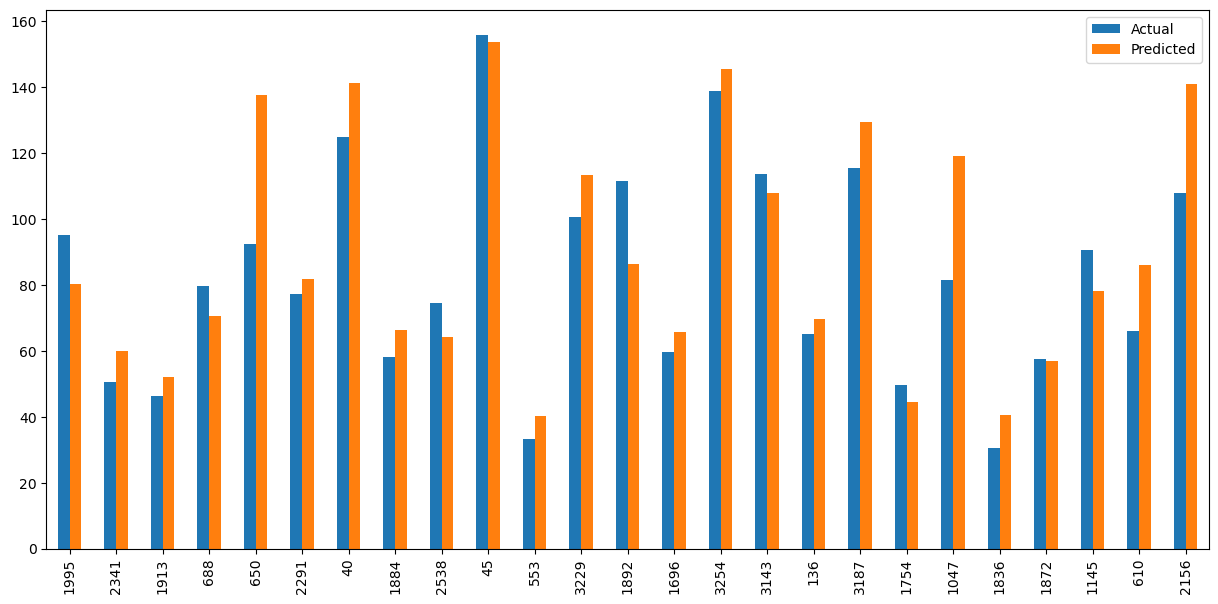

In [339]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [340]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod1_train_perf = model_performance_regression(olsmod1, x_train2, y_train)
olsmod1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230343,0.182456,0.830045,0.826965,4.294612


In [341]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod1_test_perf = model_performance_regression(olsmod1, x_test2, y_test)
olsmod1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239384,0.190964,0.825054,0.817478,4.497294


In [344]:
# training performance comparison

models_train_comp_df = pd.concat(
    [olsmodel1_train_perf.T, olsmod1_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.230340,0.230343
MAE,0.182455,0.182456
R-squared,0.830049,0.830045
Adj. R-squared,0.826897,0.826965
MAPE,4.294553,4.294612


The performance of the two models is close to each other

In [346]:
#recreating the final stats model and printing the summary again
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.830
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     276.1
Date:                   Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                           17:47:43   Log-Likelihood:                 119.03
No. Observations:                   2417   AIC:                            -152.1
Df Residuals:                       2374   BIC:                             96.93
Df Model:                             42                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Actionable Insights and Recommendations 

As expected, we can see that selfie_camera, screen_size, and int_memory are significant parameters (more significant in this order as well). As these increases, the cbrt(used_price), and by default used_price is expected to increase. This is indicated by positive coefficients for these parameters predicted by the model

EDA post data processing also indicated high_brand (i.e., expensive brands) have the maximum number of refurbished phones with large screen_size and better selfie_camera and low_brand (i.e, cheaper brands) have the lowest number of such refurbished phones, thereby reaffirming the validity of the model

1 unit increase in cbrt(new_price) is expected to increase cbrt(used_price) by almost 0.7257 units

linear correlation between cbrt(used_price) and cbrt(new_price) ; used_price and new_price during EDA was found to be strongly postive (0.93), therby reafirming model validity

4g and 5g are both significant parameters, with 5g marginally contributing positively and 4g marginally contributing negatively to cbrt(used_price) and used_price, as expected

Preliminary EDA revealed moderately positive correlation between weight of the phone and battery as the battery size increases (0.7), however, weight and battery have been found to be not significant factors in predicting cbrt(used_price) or by default used_price. RAM for the refurbished phones was found to be constant ~4GB on average across the dataset, and also insignificant. Similar to RAM, almost 90% of phones were found to be operating on Android os, also insignificant factor for prediction

The linear predictive model is able to predict the cbrt(used_price) of the phone, explaining ~83% of the variance in the data, within a mean absolute percentage error of ~4.29%. The model is hence good


___